In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from Data_Preprocessing import exp_var, hate_crime, hate_crime_combined, hc_by_year, region_grouped, race_grouped, indexed_df

In [25]:
#exp_var is a list of strings containing the exportable variables from the Data_Preprocessing.py file
exp_var

['hate_crime',
 'hate_crime_combined',
 'hc_by_year',
 'region_grouped',
 'race_grouped',
 'indexed_df']

### Project Outline - Shared Document
https://docs.google.com/document/d/1gZ5QkT95D7WJ8sPUyC0qURUVcKZQrPub2nR4gyRYPkc/edit?usp=sharing

## Exploratory Data Analysis

### YEAR RANGE

In [2]:
hate_crime['DATA_YEAR'].agg([np.max, np.min])

amax    2020
amin    1991
Name: DATA_YEAR, dtype: int64

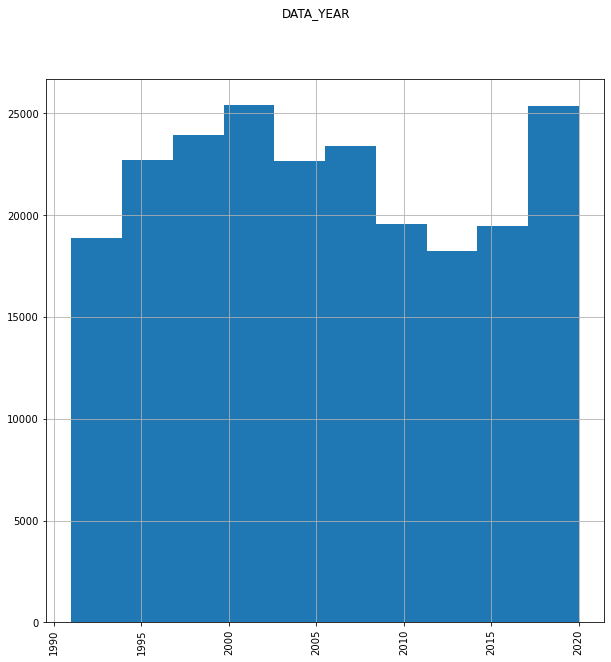

In [3]:
fig = plt.plot()
hate_crime['DATA_YEAR'].hist(figsize=(10,10))
plt.xticks(rotation='vertical')
plt.suptitle('DATA_YEAR')
plt.show()

### LOCATION/POPULATION

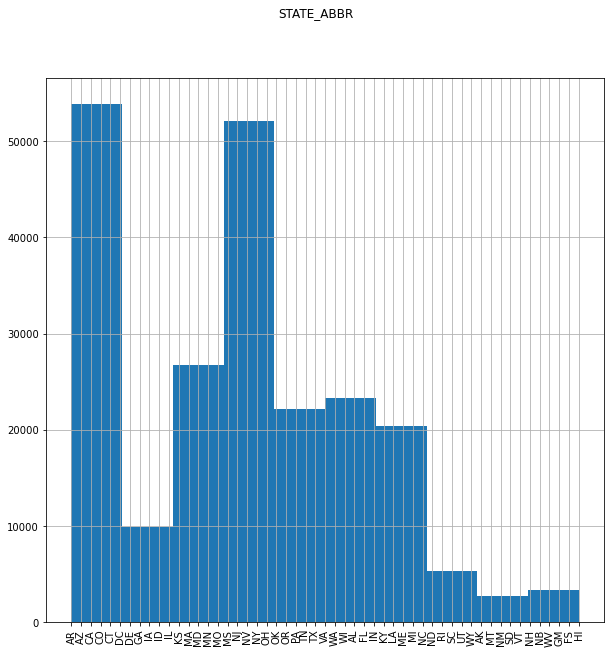

In [4]:
fig = plt.plot()
hate_crime['STATE_ABBR'].hist(figsize=(10,10))
plt.xticks(rotation='vertical')
plt.suptitle('STATE_ABBR')
plt.show()

#Observations - States, Regions, Divisions are likley skewed by population, look at correlation with population descriptions
#US Territories and Other can be dropped from REgion/Division due to small sample size

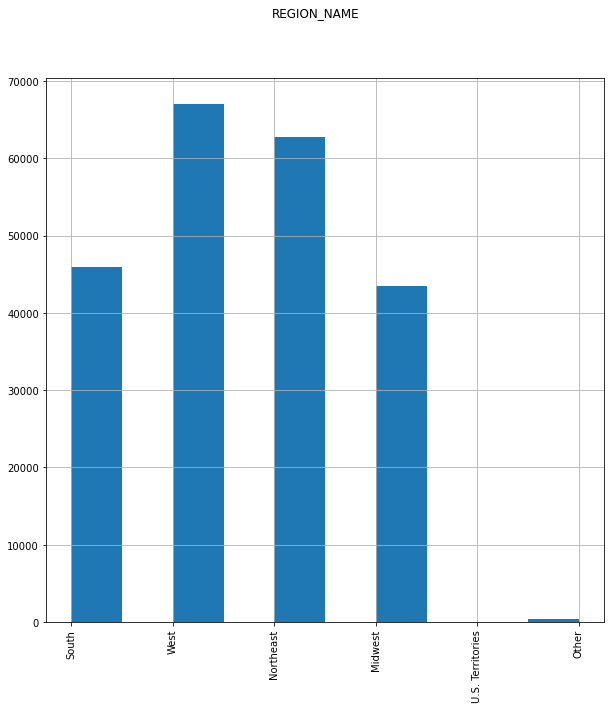

In [5]:
fig = plt.plot()
hate_crime['REGION_NAME'].hist(figsize=(10,10))
plt.xticks(rotation='vertical')
plt.suptitle('REGION_NAME')
plt.show()

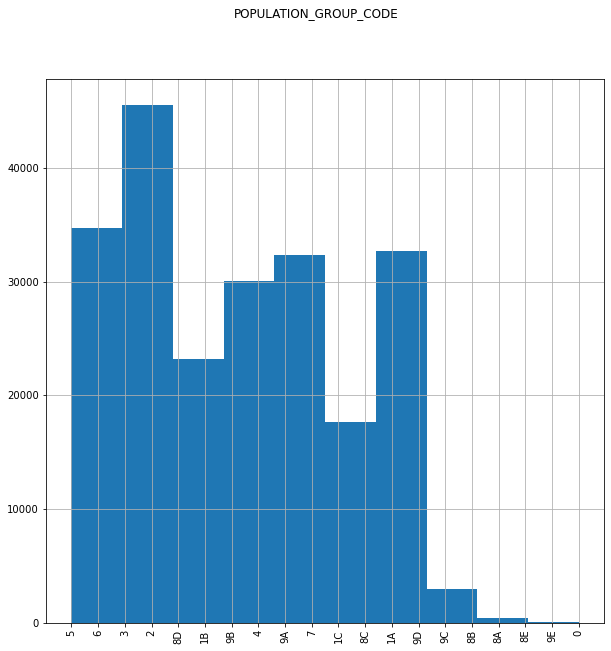

In [6]:
fig = plt.plot()
hate_crime['POPULATION_GROUP_CODE'].hist(figsize=(10,10))
plt.xticks(rotation='vertical')
plt.suptitle('POPULATION_GROUP_CODE')
plt.show()

### OFFENDER / VICTIM DATA EXPLORATION

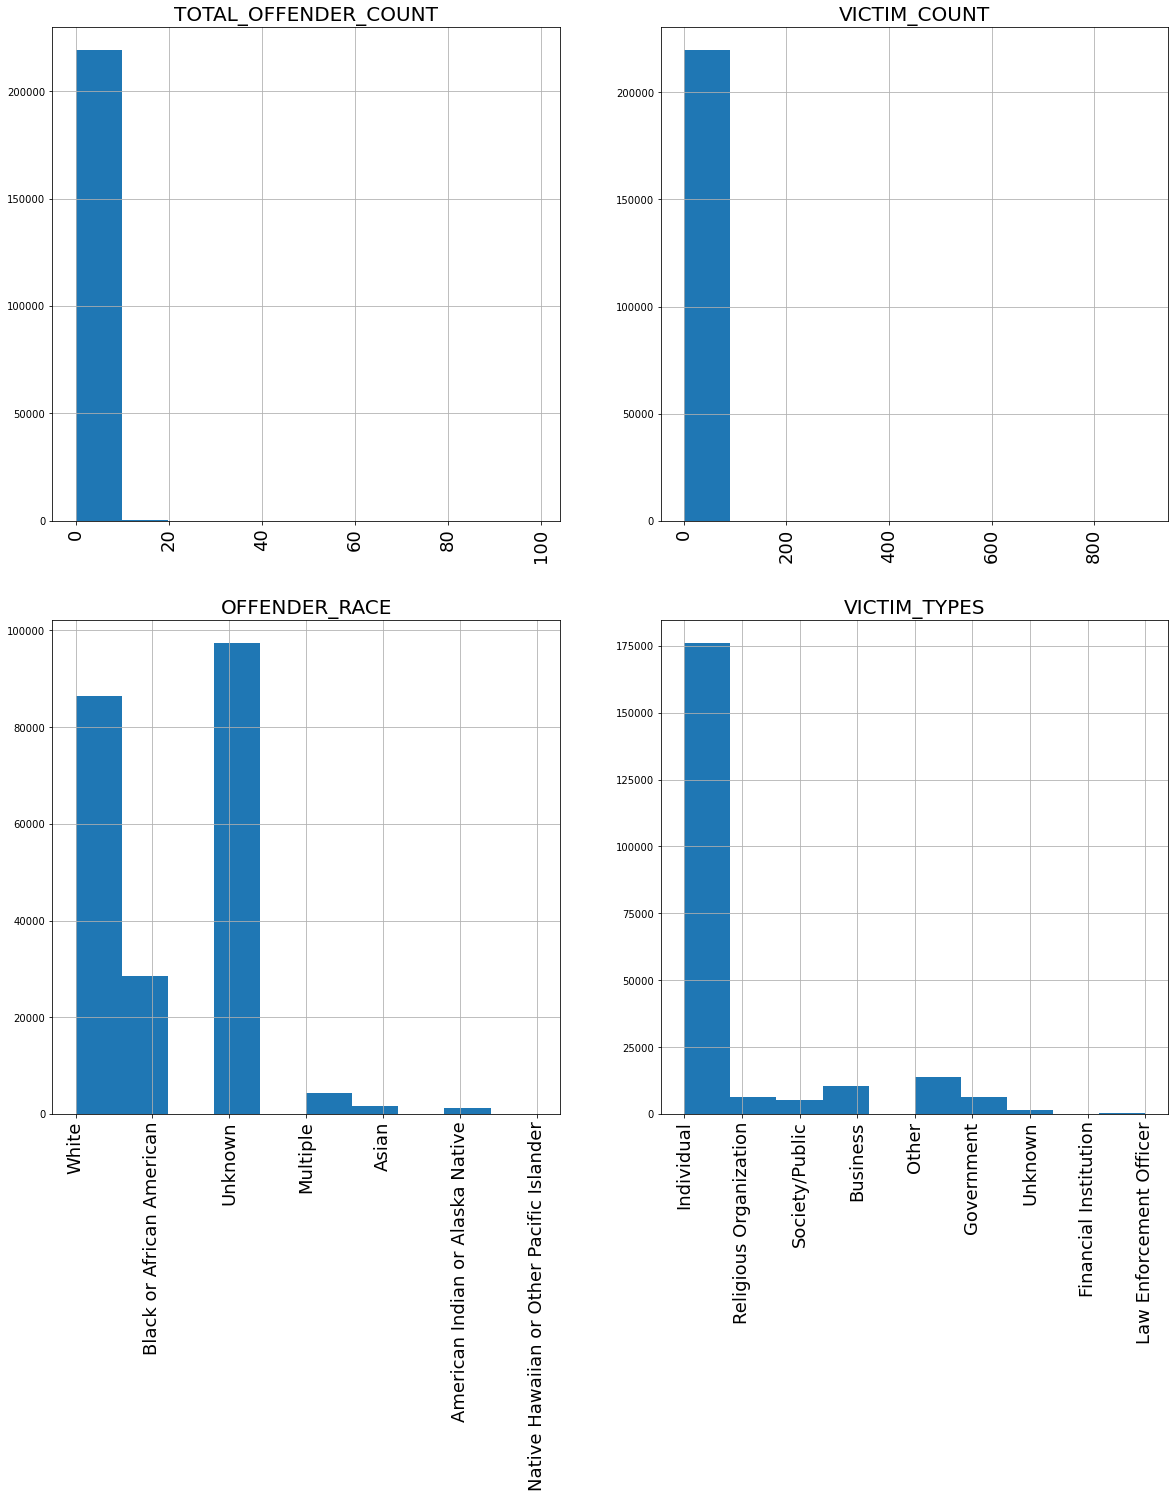

In [8]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

hate_crime['TOTAL_OFFENDER_COUNT'].hist(ax=axes[0,0])
plt.sca(axes[0,0])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('TOTAL_OFFENDER_COUNT', fontsize=20)

hate_crime['VICTIM_COUNT'].hist(ax=axes[0,1])
plt.sca(axes[0,1])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('VICTIM_COUNT', fontsize=20)

hate_crime['OFFENDER_RACE'].hist(ax=axes[1,0])
plt.sca(axes[1,0])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('OFFENDER_RACE', fontsize=20)

hate_crime['VICTIM_TYPES'].hist(ax=axes[1,1])
plt.sca(axes[1,1])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('VICTIM_TYPES', fontsize=20)


plt.show()

##Observations - Offender and Vistim count that are much larger that average should be considered outliers and removed
#Multiple Offense/Multiple Bias have too few observations in the multiple category & should be removed
# Total_Individual_Victims and Victim_count have conflicting meaning, seems like Victim Coiunt is more accurate, more explorationg needed

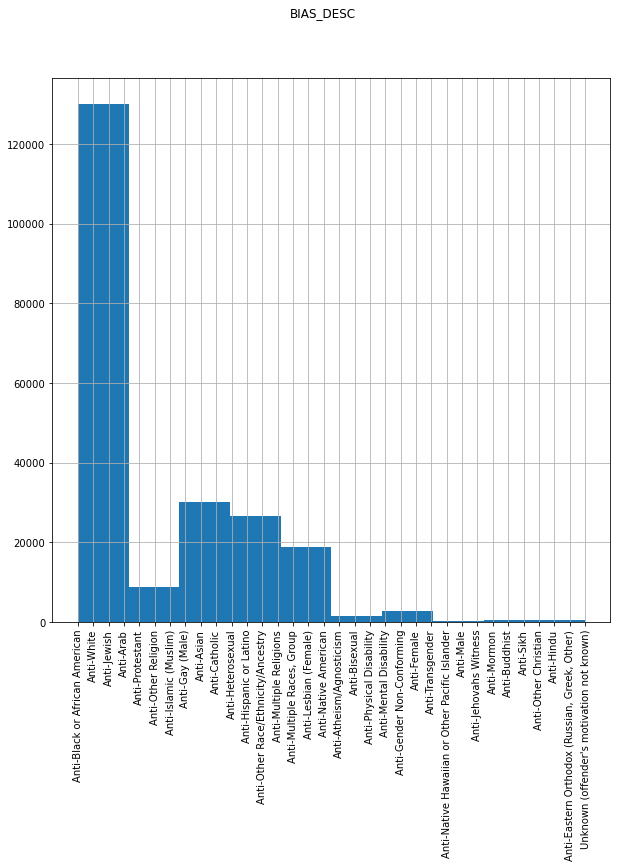

In [18]:
fig = plt.plot()
hate_crime['BIAS_DESC'].hist(figsize=(10,10))
plt.xticks(rotation='vertical')
plt.suptitle('BIAS_DESC')
plt.show()

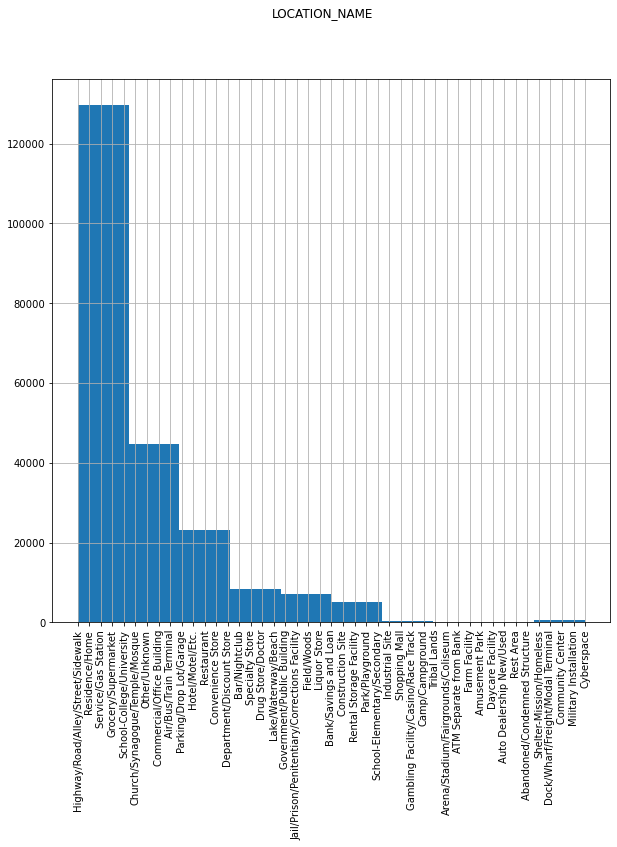

In [15]:
fig = plt.plot()
hate_crime['LOCATION_NAME'].hist(figsize=(10,10))
plt.xticks(rotation='vertical')
plt.suptitle('LOCATION_NAME')
plt.show()

### Digging Further into Data Exploration

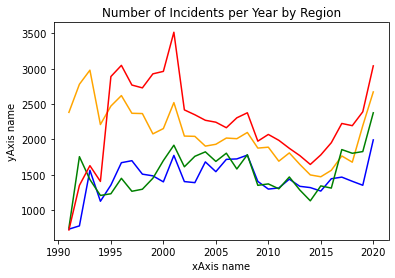

In [19]:
midwest = region_grouped[region_grouped['REGION_NAME']=='Midwest']
northeast = region_grouped[region_grouped['REGION_NAME']=='Northeast']
south = region_grouped[region_grouped['REGION_NAME']=='South']
west = region_grouped[region_grouped['REGION_NAME']=='West']

plt.plot(midwest['DATA_YEAR'],midwest['INCIDENT_COUNT'], color='blue')
plt.plot(northeast['DATA_YEAR'],northeast['INCIDENT_COUNT'], color='orange')
plt.plot(south['DATA_YEAR'],south['INCIDENT_COUNT'], color='green')
plt.plot(west['DATA_YEAR'],west['INCIDENT_COUNT'], color='red')

plt.title('Number of Incidents per Year by Region')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

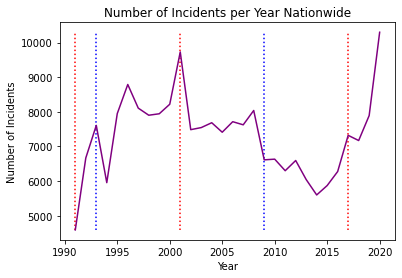

In [20]:
plt.plot(hc_by_year['DATA_YEAR'],hc_by_year['INCIDENT_COUNT'], color='purple')


plt.vlines(1991, 4589, 10299, linestyles ="dotted", colors ="r")
plt.vlines(1993, 4589, 10299, linestyles ="dotted", colors ="b")
plt.vlines(2001, 4589, 10299, linestyles ="dotted", colors ="r")
plt.vlines(2009, 4589, 10299, linestyles ="dotted", colors ="b")
plt.vlines(2017, 4589, 10299, linestyles ="dotted", colors ="r")

plt.title('Number of Incidents per Year Nationwide')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

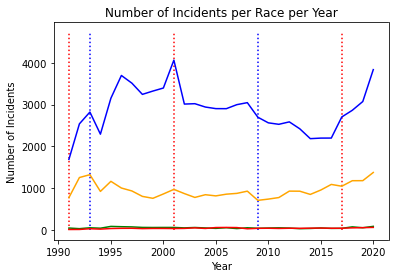

In [21]:
white = race_grouped[race_grouped['OFFENDER_RACE']=='White']
black = race_grouped[race_grouped['OFFENDER_RACE']=='Black or African American']
asian = race_grouped[race_grouped['OFFENDER_RACE']=='Asian']
native = race_grouped[race_grouped['OFFENDER_RACE']=='American Indian or Alaska Native']

plt.plot(white['DATA_YEAR'],white['INCIDENT_COUNT'], color='blue')
plt.plot(black['DATA_YEAR'],black['INCIDENT_COUNT'], color='orange')
plt.plot(asian['DATA_YEAR'],asian['INCIDENT_COUNT'], color='green')
plt.plot(native['DATA_YEAR'],native['INCIDENT_COUNT'], color='red')

plt.vlines(1991, 2, 4730, linestyles ="dotted", colors ="r")
plt.vlines(1993, 2, 4730, linestyles ="dotted", colors ="b")
plt.vlines(2001, 2, 4730, linestyles ="dotted", colors ="r")
plt.vlines(2009, 2, 4730, linestyles ="dotted", colors ="b")
plt.vlines(2017, 2, 4730, linestyles ="dotted", colors ="r")

plt.title('Number of Incidents per Race per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

### TOTAL INCIDENTS PER MONTH

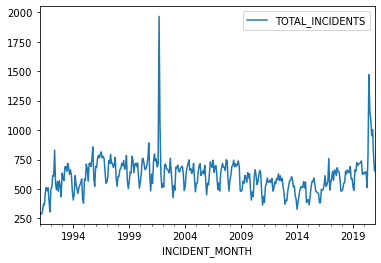

In [23]:
indexed_df.plot()
plt.show()